In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
df=pd.read_json(r'C:\Users\Prisca\Downloads\Spotify Account Data\StreamingHistory_music_0.json')
df

,endTime,artistName,trackName,msPlayed
0,2024-08-07 15:13,Jung Kook,Dreamers [Music from the FIFA World Cup Qatar ...,64399
1,2024-08-08 10:32,Jung Kook,Dreamers [Music from the FIFA World Cup Qatar ...,3349
2,2024-08-09 02:18,Alessia Cara,Easier Said,258428
3,2024-08-09 02:21,Alessia Cara,Scars To Your Beautiful,220150
4,2024-08-09 02:25,Zedd,Stay,207814
...,...,...,...,...
3495,2025-07-29 13:33,Ed Sheeran,I Don't Care (with Justin Bieber),219946
3496,2025-07-29 14:01,Benson Boone,In The Stars,174110
3497,2025-07-31 08:25,Ed Sheeran,Shape of You,6180
3498,2025-07-31 08:27,Ed Sheeran,Shape of You,128053


In [37]:
#total listening time in hours

df['seconds_played'] = df['msPlayed']/10**3

df

Total_seconds_played = (sum(df['seconds_played']))

Total_seconds_played

Total_hours_played = (Total_seconds_played/3600)

Total_hours_played

print('My Total listening time is',f'{Total_hours_played:.2f}','hours')

My Total listening time is 165.90 hours


In [4]:
#Average listening time per session

avg_per_session = df['seconds_played'].mean()

print(f"Average listening time per session: {avg_per_session:.2f}seconds")

Average listening time per session: 170.64seconds


In [5]:
# what is the longest and shortest session?

max_row = df[df['seconds_played']==df['seconds_played'].max()]
max_row
print("Most played track:", max_row['trackName'].values[0], 'by', max_row['artistName'].values[0])

min_row = df[df['seconds_played']==df['seconds_played'].min()]

print('Least played track:', min_row['trackName'].values[0], 'by', min_row['artistName'].values[0])

    

Most played track: Non Stop Super Praise Medley by Sister Ozioma Precious
Least played track: 8 Days by Ayo Maff


In [6]:
# how many total tracks have i listened to?

len(df['trackName'].unique())

682

In [7]:
# how many artists have i listened to?

len(df['artistName'].unique())

255

In [8]:
# which artist did i listen to the most?

Artist = df.groupby('artistName')['seconds_played'].sum().sort_values(ascending=False).head(1)
Artist
print('The artist i listened to the most is',(Artist).index[0])

The artist i listened to the most is Alan Walker


In [9]:
#which track did i listen to the most

track = df.groupby('trackName')['seconds_played'].sum().sort_values(ascending=False).head(1)
most_played_track = track.index[0]
most_played_track

row = df[df['trackName'] == most_played_track].head(1)

print('The track i listen to the most is',(most_played_track),'by',row['artistName'].values[0])

The track i listen to the most is Perfect by Ed Sheeran


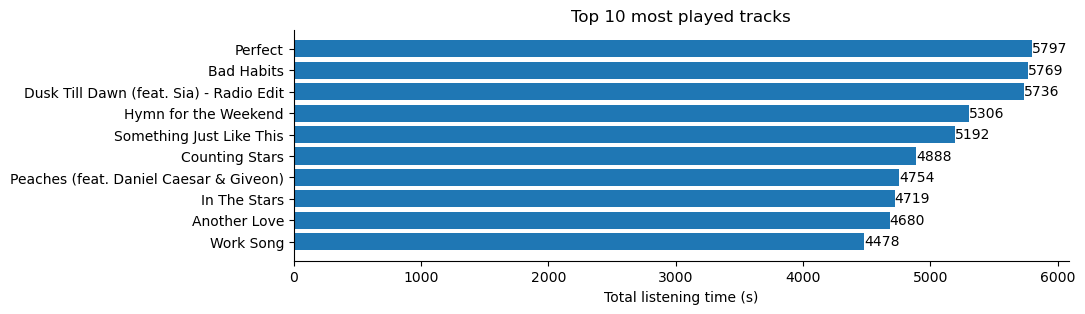

In [10]:
#what's my top 10 most played tracks?

Top_10 = df.groupby(['artistName','trackName'])['seconds_played'].sum().sort_values(ascending = True).tail(10).copy().reset_index()


Top_10

plt.figure(figsize=(10,3))

plt.barh(Top_10['trackName'],Top_10['seconds_played'])

for i,value in enumerate((Top_10)['seconds_played']):
    plt.text(Top_10['seconds_played'].iloc[i],Top_10['trackName'].iloc[i],f'{value:.0f}',ha='left',va='center')
plt.title('Top 10 most played tracks')
plt.xlabel('Total listening time (s)')
sns.despine()
plt.show()


In [11]:
# Top 10 most played artistes

Top_10 = df.groupby('artistName')['seconds_played'].sum().sort_values(ascending = False).head(10).copy().reset_index()

Top_10

,artistName,seconds_played
0,Alan Walker,30888.967
1,Justin Bieber,29525.353
2,Ed Sheeran,26111.268
3,Alec Benjamin,25839.752
4,OneRepublic,24290.949
5,Fireboy DML,20800.632
6,Maroon 5,16969.348
7,Bruno Mars,13255.079
8,Coldplay,12663.971
9,Hozier,11272.311


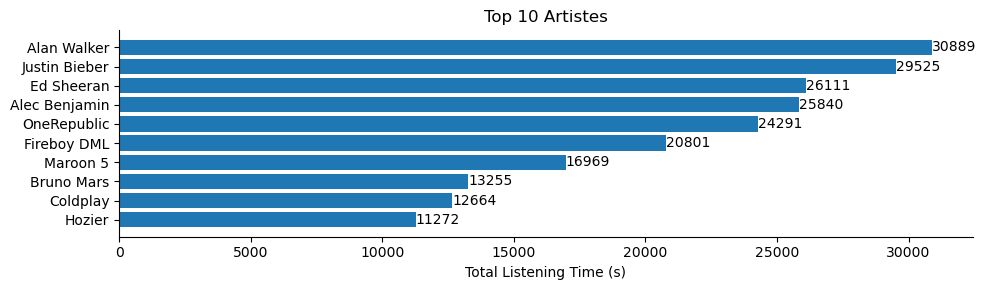

In [12]:
#who are my Top 10 most listened artistes

Top_artists = df.groupby(df['artistName'])['seconds_played'].sum().sort_values(ascending=True).tail(10).reset_index()

Top_artists

plt.figure(figsize=(10,3))

plt.barh(Top_artists['artistName'],Top_artists['seconds_played'])

for i,value in enumerate((Top_artists)['seconds_played']):
    plt.text(Top_artists['seconds_played'].iloc[i],Top_artists['artistName'].iloc[i],f'{value:.0f}',ha='left',va='center')

plt.xlabel('Total Listening Time (s)')
plt.ylabel('')
plt.title('Top 10 Artistes')
sns.despine()
plt.tight_layout()
plt.show()



In [13]:
df.info()

from datetime import datetime

df['endTime']=pd.to_datetime(df['endTime'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   endTime         3500 non-null   object 
 1   artistName      3500 non-null   object 
 2   trackName       3500 non-null   object 
 3   msPlayed        3500 non-null   int64  
 4   seconds_played  3500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 136.8+ KB


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   endTime         3500 non-null   datetime64[ns]
 1   artistName      3500 non-null   object        
 2   trackName       3500 non-null   object        
 3   msPlayed        3500 non-null   int64         
 4   seconds_played  3500 non-null   float64       
 5   day             3500 non-null   object        
 6   month_str       3500 non-null   object        
 7   month_int       3500 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 218.9+ KB


In [15]:
#which day of the week do i stream music the most?

len(df['endTime'].dt.date.unique())

df['day'] = df['endTime'].dt.strftime('%A')

day = df.groupby('day')['seconds_played'].sum().sort_values(ascending = False).head(1)

print('I listened to music the most on',(day).index[0])

I listened to music the most on Saturday


In [20]:
# what time of the day do i usually listen to music? (hourly breakdown)
m = df['endTime'].dt.strftime('%H').value_counts().head(1)
print('I listen to music the most at',(m).index[0],'am in the morning')

I listen to music the most at 10 am in the morning


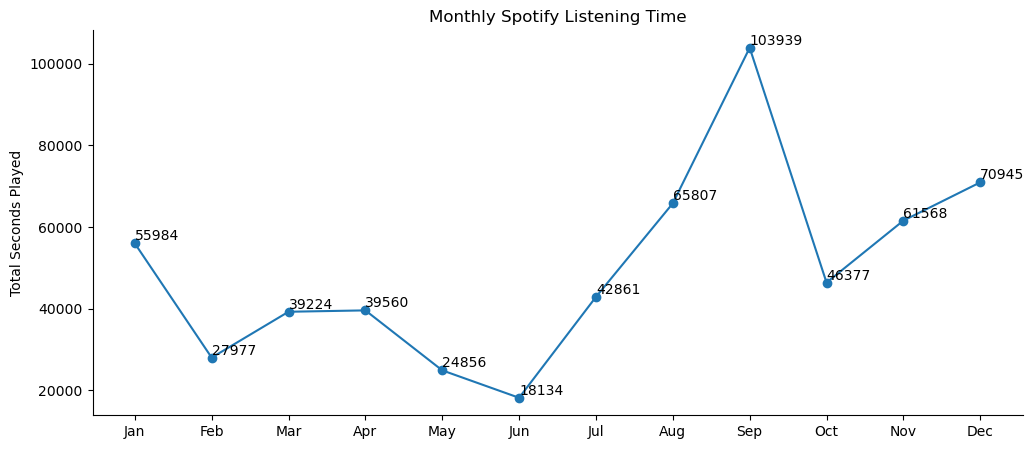

In [21]:
# how has my listening habit changed over the month?

df['month_str'] = df['endTime'].dt.strftime('%b')
df['month_int'] = df['endTime'].dt.strftime('%m')
m = df.groupby(['month_str','month_int'])['seconds_played'].sum().reset_index().sort_values('month_int')

plt.figure(figsize=(12,5))
plt.plot('month_str','seconds_played', data=m, marker = 'o')

for i,value in enumerate(m['seconds_played']):
    plt.text(m['month_str'].iloc[i],m['seconds_played'].iloc[i],f'{value:.0f}', ha='left', va = 'bottom', fontsize=10)
ax=plt.gca()
plt.ylabel('Total Seconds Played')
plt.title('Monthly Spotify Listening Time')
sns.despine()
plt.show()

In [19]:
#most listened days

df.groupby(df['endTime'].dt.date)['seconds_played'].sum().sort_values(ascending = False).head(10)

endTime
2024-08-09    28434.055
2024-09-04    22318.084
2025-04-29    19723.227
2024-08-11    19472.161
2024-09-21    18776.690
2024-09-07    14876.451
2024-10-13    14407.034
2025-01-29    14400.677
2025-07-29    13973.739
2025-07-06    12759.406
Name: seconds_played, dtype: float64

In [18]:
df

,endTime,artistName,trackName,msPlayed,seconds_played,day,month_str,month_int
0,2024-08-07 15:13:00,Jung Kook,Dreamers [Music from the FIFA World Cup Qatar ...,64399,64.399,Wednesday,Aug,08
1,2024-08-08 10:32:00,Jung Kook,Dreamers [Music from the FIFA World Cup Qatar ...,3349,3.349,Thursday,Aug,08
2,2024-08-09 02:18:00,Alessia Cara,Easier Said,258428,258.428,Friday,Aug,08
3,2024-08-09 02:21:00,Alessia Cara,Scars To Your Beautiful,220150,220.150,Friday,Aug,08
4,2024-08-09 02:25:00,Zedd,Stay,207814,207.814,Friday,Aug,08
...,...,...,...,...,...,...,...,...
3495,2025-07-29 13:33:00,Ed Sheeran,I Don't Care (with Justin Bieber),219946,219.946,Tuesday,Jul,07
3496,2025-07-29 14:01:00,Benson Boone,In The Stars,174110,174.110,Tuesday,Jul,07
3497,2025-07-31 08:25:00,Ed Sheeran,Shape of You,6180,6.180,Thursday,Jul,07
3498,2025-07-31 08:27:00,Ed Sheeran,Shape of You,128053,128.053,Thursday,Jul,07
